<a href="https://colab.research.google.com/github/dchlseo/yolo-moving-average/blob/main/model/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [ ]:


# hand data dir
data_dir = '/content/drive/MyDrive/00DataScience/ds_study/DLproject/hand_movement/data/data_ver2-2_fullData/hand'

# eraser data
eraser_data_dir = '/content/drive/MyDrive/00DataScience/ds_study/DLproject/hand_movement/data/data_ver2-2_fullData/eraser'


train_dir = data_dir + '/train'
val_dir = data_dir + '/val'

train_images_dir = train_dir + '/images'
val_images_dir = val_dir + '/images'

train_labels_dir = train_dir + '/labels'
val_labels_dir = val_dir + '/labels'

train_images = os.listdir(train_images_dir)
val_images = os.listdir(val_images_dir)

train_labels = os.listdir(train_labels_dir)
val_labels = os.listdir(val_labels_dir)

eraser_train_dir = eraser_data_dir + '/train'
eraser_val_dir = eraser_data_dir + '/val'

eraser_train_images_dir = eraser_train_dir + '/images'
eraser_val_images_dir = eraser_val_dir + '/images'

eraser_train_labels_dir = eraser_train_dir + '/labels'
eraser_val_labels_dir = eraser_val_dir + '/labels'

eraser_train_images = os.listdir(eraser_train_images_dir)
eraser_val_images = os.listdir(eraser_val_images_dir)

eraser_train_labels = os.listdir(eraser_train_labels_dir)
eraser_val_labels = os.listdir(eraser_val_labels_dir)


In [ ]:
print('HAND train images: ', len(train_images))
print('HAND val images: ', len(val_images))
print('HAND train labels: ', len(train_labels))
print('HAND val labels: ', len(val_labels))

print('ERASER train images: ', len(eraser_train_images))
print('ERASER val images: ', len(eraser_val_images))
print('ERASER train labels: ', len(eraser_train_labels))

HAND train images:  1451
HAND val images:  367
HAND train labels:  1451
HAND val labels:  367
ERASER train images:  160
ERASER val images:  42
ERASER train labels:  160


In [ ]:
label_data = [] # file name, label, bbox

for txtfile in train_labels:
    if txtfile.endswith('.txt'):
        with open(train_labels_dir + '/' + txtfile, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:  # 1 label, 4 coordinates
                  label = int(parts[0])
                  bbox = [float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])]
                  data = {txtfile: [label, bbox]}
                  label_data.append(data)

In [ ]:
len(label_data)

1451

In [ ]:
sample_open = label_data[80]

sample_folding = label_data[756]

sample_closed = label_data[550]

print(sample_open)
print(sample_folding)
print(sample_closed)

{'image_852.txt': [0, [0.5328125, 0.4734375, 0.315625, 0.7609375]]}
{'image_1547.txt': [1, [0.48125, 0.578125, 0.25625, 0.61953125]]}
{'image_1733.txt': [2, [0.57421875, 0.721875, 0.38828125, 0.4609375]]}


In [ ]:

list(sample_open.items())[0][1][1]


[0.5328125, 0.4734375, 0.315625, 0.7609375]

list

In [ ]:
def get_title(img_label):
  if img_label == 0:
    return 'OPEN HAND: 0'
  elif img_label == 1:
    return 'FOLDING HAND: 1'
  elif img_label == 2:
    return 'CLOSED HAND: 2'

def draw_image_bbox(img_dict, img_data, target_size=(200, 200)):
    img_name = list(img_dict.items())[0][0].split('.')[0] + '.jpg'
    img_label = list(img_dict.items())[0][1][0]
    title = get_title(img_label)
    bbox = list(img_dict.items())[0][1][1]
    # print(f'bbox: {bbox}')
    img_path = None

    for img in img_data:
        if img_name in img:
            img_path = train_images_dir + '/' + img
            break

    if img_path is not None:
        # Visualize img_path using matplotlib
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Change color scheme
        # img = cv2.resize(img, target_size) # resize
        # print(f'img.shape: {img.shape}')
        # draw bounding box
        img_height, img_width, _ = img.shape

        # x_min, y_min, x_max, y_max = bbox
        # x_min = int(x_min * img_width)
        # y_min = int(y_min * img_height)
        # x_max = int(x_max * img_width)
        # y_max = int(y_max * img_height)
        # print(f'Scaled BBox: {(x_min, y_min, x_max, y_max)}')

        x_min, y_min, bbox_width, bbox_height = bbox
        x_min = int(x_min * img_width)
        y_min = int(y_min * img_height)
        x_max = x_min + int(bbox_width * img_width)
        y_max = y_min + int(bbox_height * img_height)

        # offset bbox (xmin, ymin only)
        offset_x = 110  # Adjust this value as needed
        offset_y = 240  # Adjust this value as needed
        x_min -= offset_x
        y_min -= offset_y
        x_max -= offset_x
        y_max -= offset_y

        # print(f'Scaled BBox: {(x_min, y_min, x_max, y_max)}')

        # img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # img = cv2.circle(img, (x_min, y_min), radius=5, color=(255, 0, 0), thickness=-1)

        plt.axis('off')  # Get rid of axis
        plt.title(title)
        plt.imshow(img)
        plt.show()
    else:
        print(f"Image {img_name} not found in the provided directory.")


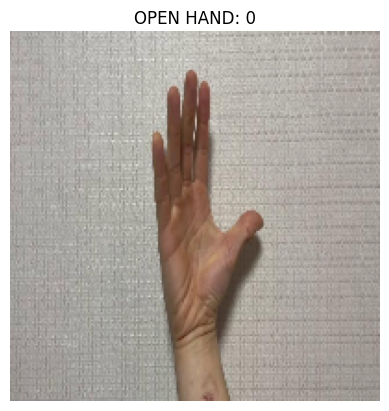

In [ ]:
draw_image_bbox(sample_open, train_images)

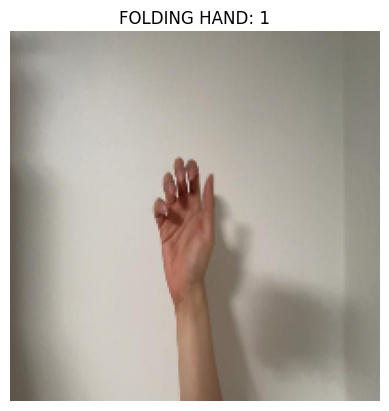

In [ ]:
draw_image_bbox(sample_folding, train_images)

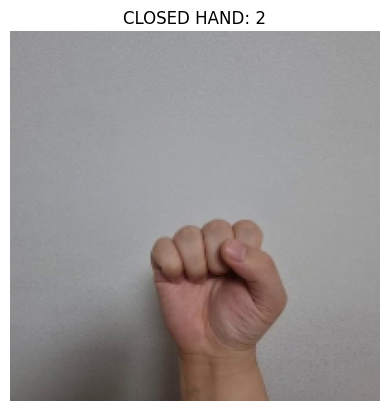

In [ ]:
draw_image_bbox(sample_closed, train_images)

In [ ]:
def draw_multiple_images(image_dicts, img_data_dir, cols=1):
    """
    Draws multiple images in a grid.

    :param image_dicts: List of dictionaries containing image information.
    :param img_data_dir: Directory containing image files.
    :param cols: Number of columns in the subplot grid.
    """
    num_images = len(image_dicts)
    rows = num_images // cols + int(num_images % cols > 0)

    plt.figure(figsize=(5,15))

    for i, img_dict in enumerate(image_dicts, start=1):
        plt.subplot(rows, cols, i)
        draw_image_bbox(img_dict, img_data_dir)

    plt.tight_layout()
    plt.show()


In [ ]:
# def concatenate_images_vertically(image_dicts, img_data_dir):
#     """
#     Concatenates multiple images into a single image, arranged vertically.

#     :param image_dicts: List of dictionaries containing image information.
#     :param img_data_dir: Directory containing image files.
#     """
#     images = []

#     for img_dict in image_dicts:
#         img_name = list(img_dict.items())[0][0].split('.')[0] + '.jpg'
#         img_path = os.path.join(img_data_dir, img_name)

#         if os.path.exists(img_path):
#             img = cv2.imread(img_path)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             images.append(img)
#         else:
#             print(f"Image {img_name} not found in the provided directory.")

#     # Resize images to the same width
#     max_width = max(img.shape[1] for img in images)
#     resized_images = [cv2.resize(img, (max_width, int(img.shape[0] * max_width / img.shape[1]))) for img in images]

#     # Concatenate images vertically
#     final_image = np.concatenate(resized_images, axis=0)

#     plt.imshow(final_image)
#     plt.axis('off')
#     plt.show()

In [ ]:
open_labels = []
folding_labels = []
closed_labels = []
for label in label_data:
    label_num = list(label.items())[0][1][0]
    if label_num == 0:
        open_labels.append(label)
    elif label_num == 1:
        folding_labels.append(label)
    elif label_num == 2:
        closed_labels.append(label)


In [ ]:
# from open_labels, folding_labels, closed_labels, randomly sample 3 from each list:
samples_open = random.sample(open_labels, 3)
samples_folding = random.sample(folding_labels, 3)
samples_closed = random.sample(closed_labels, 3)

In [ ]:
samples_closed = random.sample(closed_labels, 3)

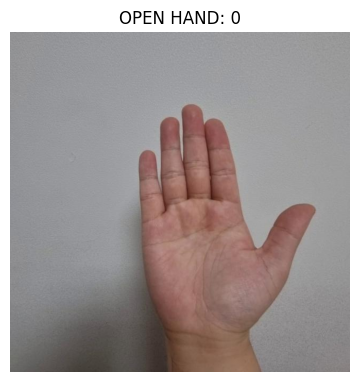

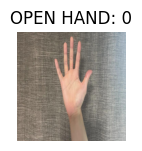

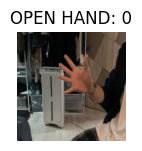

<Figure size 640x480 with 0 Axes>

In [ ]:
draw_multiple_images(samples_open, train_images)

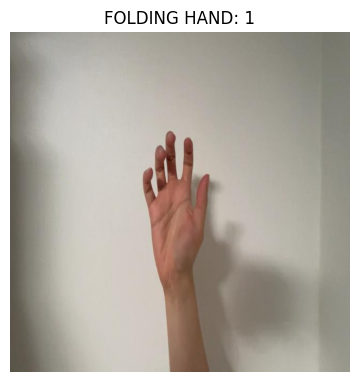

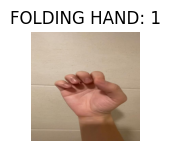

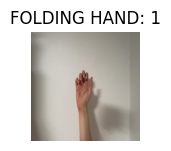

<Figure size 640x480 with 0 Axes>

In [ ]:
draw_multiple_images(samples_folding, train_images)

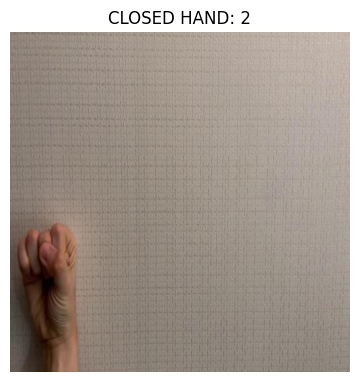

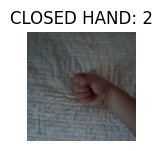

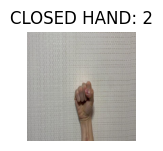

<Figure size 640x480 with 0 Axes>

In [ ]:
draw_multiple_images(samples_closed, train_images)

In [ ]:
# Sample data - replace these with your actual metrics
epochs = list(range(1, 31))  # Epochs 1 to 30
box_loss = [1.62, 1.721, 1.679, 1.622, 1.542, 1.461, 1.422, 1.369, 1.35, 1.318, 1.256, 1.245, 1.256, 1.226, 1.196, 1.179, 1.151, 1.146, 1.114, 1.059, 0.9365, 0.919, 0.8875, 0.8642, 0.8267, 0.8016, 0.7827, 0.7783, 0.7495, 0.7205]
cls_loss = [2.375, 2.079, 1.922, 1.783, 1.703, 1.58, 1.519, 1.451, 1.425, 1.37, 1.328, 1.288, 1.268, 1.266, 1.22, 1.18, 1.146, 1.098, 1.082, 1.036, 0.8657, 0.8136, 0.7678, 0.7425, 0.7129, 0.6701, 0.6467, 0.6226, 0.6118, 0.556]
dfl_loss = [1.725, 1.783, 1.732, 1.686, 1.621, 1.556, 1.535, 1.492, 1.476, 1.456, 1.411, 1.404, 1.405, 1.394, 1.372, 1.36, 1.343, 1.342, 1.315, 1.287, 1.316, 1.31, 1.287, 1.267, 1.226, 1.214, 1.19, 1.194, 1.17, 1.141]
mAP50 = [0.0421, 0.166, 0.257, 0.377, 0.608, 0.517, 0.695, 0.688, 0.723, 0.757, 0.733, 0.814, 0.801, 0.834, 0.821, 0.826, 0.87, 0.867, 0.881, 0.898, 0.907, 0.897, 0.885, 0.931, 0.921, 0.926, 0.904, 0.934, 0.929, 0.938]


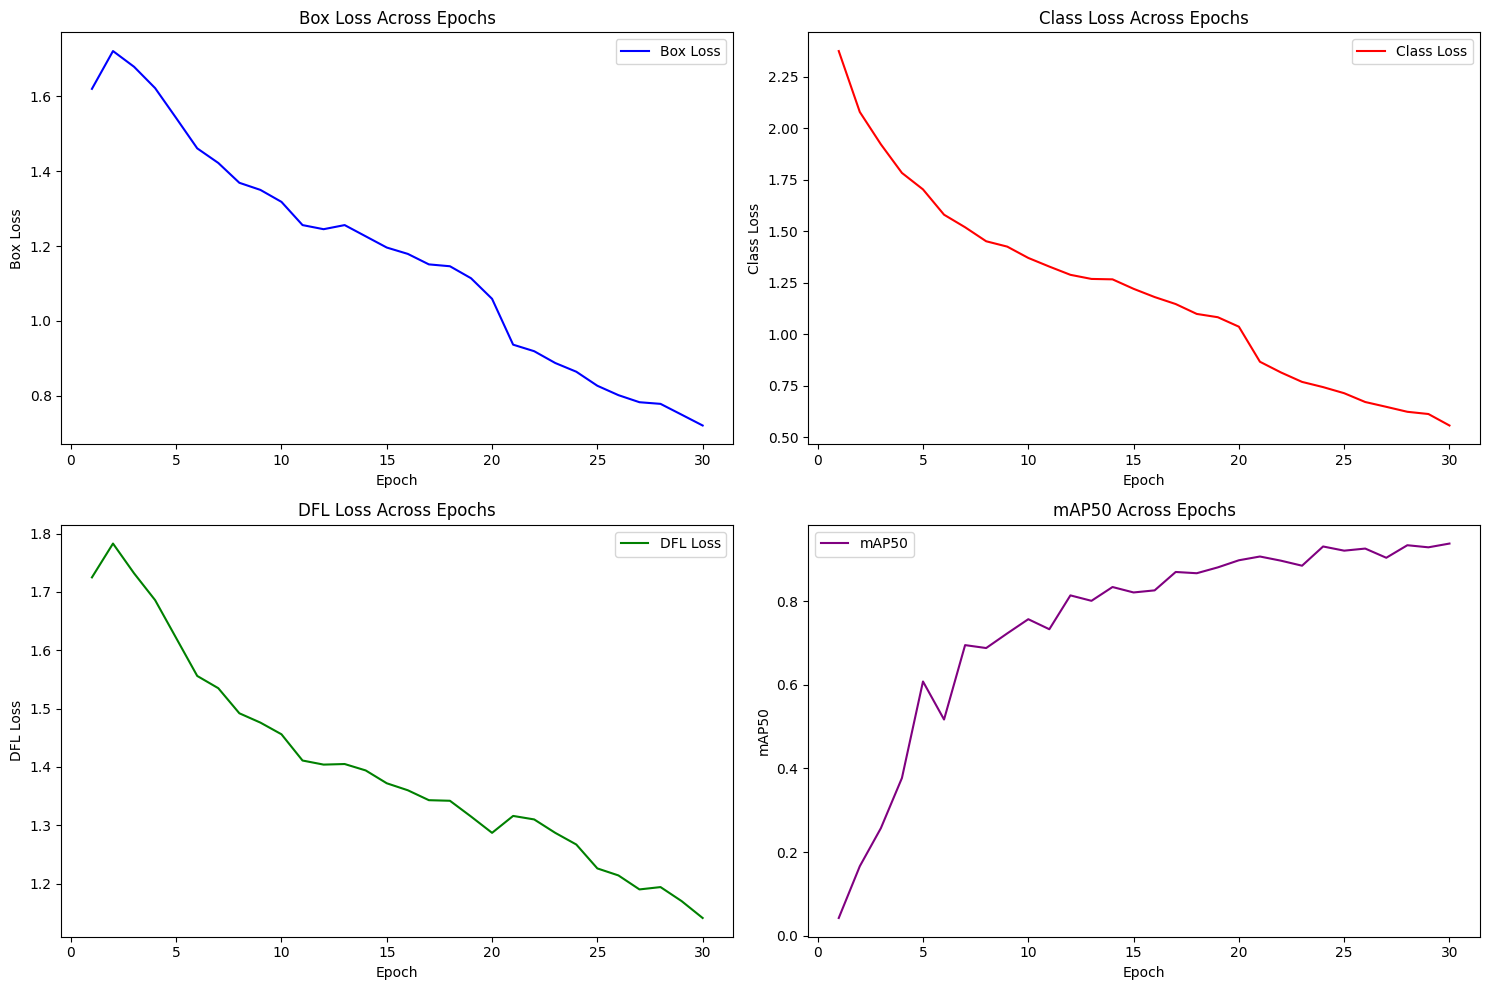

In [ ]:
plt.figure(figsize=(15, 10))

# Box Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, box_loss, label='Box Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss Across Epochs')
plt.legend()

# Class Loss
plt.subplot(2, 2, 2)
plt.plot(epochs, cls_loss, label='Class Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('Class Loss Across Epochs')
plt.legend()

# DFL Loss
plt.subplot(2, 2, 3)
plt.plot(epochs, dfl_loss, label='DFL Loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.title('DFL Loss Across Epochs')
plt.legend()

# mAP50
plt.subplot(2, 2, 4)
plt.plot(epochs, mAP50, label='mAP50', color='purple')
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.title('mAP50 Across Epochs')
plt.legend()

plt.tight_layout()
plt.show()
